# 과제3. 직원 이직 분석

* 여러분은 OO회사의 **데이터분석가** 입니다.
* **인사팀**에서는 여러분에게 우리 회사 직원의 **이직(Attrition)에 영향을 주는 요인**을 분석해달라고 요청해 왔습니다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

* 분석 단위 : 직원 한사람, 한사람...
* 설명에서 언급되어지지 않은 사항은 직접 고민하며 스스로 정해서 진행하시면 됩니다.^^
* 자\~! 이제 시작해 봅시다\~!

----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 3개 이상씩, 전체 6개 이상의 변수를 도출, 가설을 수립하시오.

* 가설1 : 경력이 많은 사람은 이직을 많이 할 것이다

* 가설2 : 결혼한 사람은 집-직장거리에 민감할 것이다

* 가설3 : 결혼한 사람은 이직을 많이 하지 않을 것이다

* 가설4 : 직무만족도가 높고 동료와의 관계가 좋으면 이직하지 않을 것이다

* 가설5 : 워라밸이 나쁘거나 야근을 많이 하면 이직을 많이 할 것이다

* 가설6 : 나이가 어리고 이 회사가 첫 직장인 사람은 이직을 적게 할 것이다

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) target

In [3]:
target = 'Attrition'

* 1) 변수의 비즈니스 의미 : 이직 여부와 이직률 분석

* 2) 이직률은 범주 데이터

* 3) 결측치 확인

In [4]:
data.isnull().sum()

Attrition                    0
Age                          0
DistanceFromHome            54
Gender                       0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
dtype: int64

* 3-1) 결측치 처리 : 개별 데이터 분석 후 결정할 예정(이하 내용 참고)

4) 기초통계량

In [10]:
data.describe()

,Attrition,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
count,1250.000000,1250.000000,1196.000000,1250.000000,1250.000000,1229.000000,1250.000000,1250.000000,1250.00000,1250.000000
mean,0.160000,36.931200,9.258361,2.729600,6525.548000,2.678600,15.216000,2.717600,11.33920,2.761600
std,0.366753,9.122162,8.166016,1.110617,4676.979554,2.473647,3.625556,1.074977,7.79687,0.715245
min,0.000000,18.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,1.000000,0.00000,1.000000
25%,0.000000,30.000000,2.000000,2.000000,2932.250000,1.000000,12.000000,2.000000,6.00000,2.000000
50%,0.000000,36.000000,7.000000,3.000000,4988.000000,2.000000,14.000000,3.000000,10.00000,3.000000
75%,0.000000,43.000000,14.000000,4.000000,8437.500000,4.000000,18.000000,4.000000,15.00000,3.000000
max,1.000000,60.000000,29.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,40.00000,4.000000


5) 분포

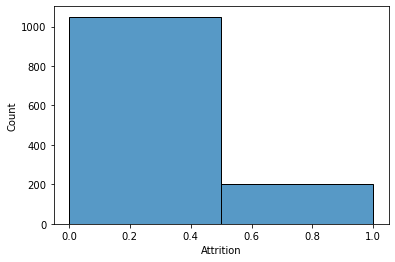

In [253]:
sns.histplot(data = data, x = target, bins = 2)
plt.show()

6) 정리

* 이직률이 그렇게 높지는 않아 보인다.

### 2) 나이

1) 비즈니스 의미 : 연령과 이직률의 상관관계를 조사하기 위함

2) 데이터 타입 : 숫자

3) 결측치 확인

In [15]:
Age = 'Age'
data[Age].isnull().sum()

0

4) 기초통계량

In [16]:
data[Age].describe()

count    1250.000000
mean       36.931200
std         9.122162
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

5) 분포

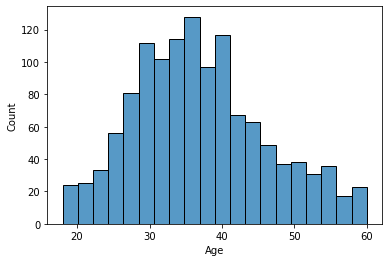

In [19]:
sns.histplot(data = data, x = Age, bins = 20)
plt.show()

6) 결론

* 직원 중에 30대가 다수를 차지하고 있고, 20대 초반과 50대 이상의 비중은 적다.

* 연령대를 분류할 때 20대 초반, 20대 후반, 30대, 40대 초반, 40대 후반, 50대 이후로 분류해 보자.

### 3) Distance

In [20]:
Distance = 'DistanceFromHome'

1) 비즈니스적 의미 : 통근 거리와 이직률의 상관관계를 조사하기 위함

2) 데이터 타입 : 숫자

3) 결측치 조사

In [21]:
data[Distance].isnull().sum()

54

3-1) 결측치 처리 : 

* 결측치를 제거하기에는 자료 수가 너무 많고, 임의의 값으로 대치하기에는 그 근거가 불확실하다.

* 그래서 일단은 처리하지 않고 둔 후, 분석하려는 관점과 상황에 따라 처리 여부를 결정하려 한다.

4) 기초통계량

In [22]:
data[Distance].describe()

count    1196.000000
mean        9.258361
std         8.166016
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

5) 분포

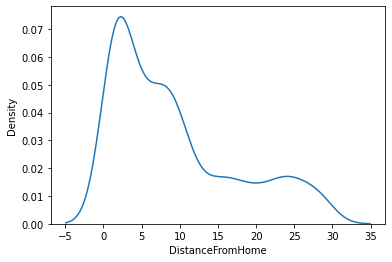

In [23]:
sns.kdeplot(data = data, x = Distance)
plt.show()

6) 결론

* 집에서 10분거리 이내가 대다수이다.

* 15분 이상 걸리는 집단이 이직을 결심하는 경우가 많은지 볼 필요가 있다.

### 4) JobSatisfaction

In [24]:
Satisfaction = 'JobSatisfaction'

1) 비즈니스적 의미 : 직장 만족도와 이직률의 상관관계를 조사하기 위함

2) 데이터 타입 : 범주

3) 결측치 파악

In [26]:
data[Satisfaction].isnull().sum()

0

4) 기초통계량

In [27]:
data[Satisfaction].describe()

count    1250.000000
mean        2.729600
std         1.110617
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

5) 분포

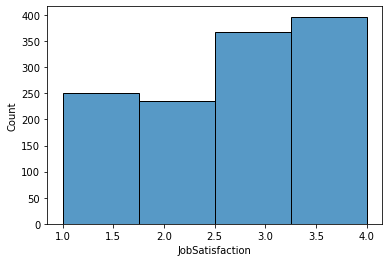

In [256]:
sns.histplot(data = data, x = Satisfaction, bins = 4)
plt.show()

6) 결론

* 직무에 대체로 만족하는 사람들의 비율이 높다.

* 직무 만족도가 1 또는 2인 사람들이 이직을 많이 할 가능성이 있다.

### 5) Income

In [34]:
Income = 'MonthlyIncome'

1) 비즈니스적 의미 : 월급과 이직률의 상관관계를 조사하기 위함

2) 데이터 타입 : 숫자

3) 결측치 조사

In [35]:
data[Income].isnull().sum()

0

4) 기초통계량

In [36]:
data[Income].describe()

count     1250.000000
mean      6525.548000
std       4676.979554
min       1009.000000
25%       2932.250000
50%       4988.000000
75%       8437.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

5) 분포

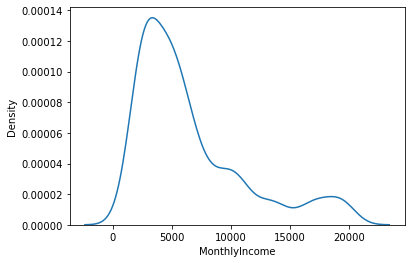

In [37]:
sns.kdeplot(data = data, x = Income)
plt.show()

6) 결론

* 월급이 5천달러 전후인 경우가 대다수이다.

* 5천달러 전후로 이직여부가 바뀌지는 않을까?

### 6) NumCompaniesWorked

In [38]:
WorkedBefore = 'NumCompaniesWorked'

1) 비즈니스 의미 : 이전에 일했던 직장 수와 이직률의 상관관계

2) 데이터 타입 : 숫자

3) 결측치 확인

In [39]:
data[WorkedBefore].isnull().sum()

21

* 3-1) 결측치 처리 : 응답이 없는 것은 이전에 일했던 경험이 없다는 것으로 해석할 수 있으므로, 결측치를 0으로 대체

In [40]:
data[WorkedBefore].fillna(0 , inplace = True)
data.isnull().sum()

Attrition                    0
Age                          0
DistanceFromHome            54
Gender                       0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
dtype: int64

4) 기초통계량

In [41]:
data[WorkedBefore].describe()

count    1250.000000
mean        2.633600
std         2.476824
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

5) 분포

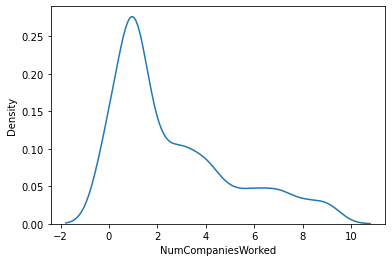

In [42]:
sns.kdeplot(data = data, x = WorkedBefore)
plt.show()

6) 결론

* 결측치를 0으로 대체했음에도 해당 기업이 첫 직장인 경우보다 그렇지 않은 경우가 훨씬 많다.

### 7) RelationshipSatisfaction	

In [43]:
Relation = 'RelationshipSatisfaction'

1) 비즈니스 의미 : 동료관계와 이직여부의 상관관계 조사를 위함

2) 데이터 타입 : 범주

3) 결측치 조사

In [44]:
data[Relation].isnull().sum()

0

4) 기초통계량

In [45]:
data[Relation].describe()

count    1250.000000
mean        2.717600
std         1.074977
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64

5) 분포

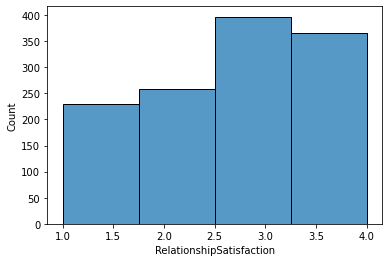

In [255]:
sns.histplot(data = data, x = Relation, bins = 4)
plt.show()

6) 결론

* 동료관계가 만족스러운 사람이 그렇지 못한 사람보다 많다.

* 동료관계가 불만인 사람들은 이직을 많이 할 것 같다.

### 8) Overtime

In [53]:
Overtime = 'OverTime'

1) 비즈니스 의미 : 야근 여부와 이직률의 상관관계

2) 데이터 타입 : 범주

3) 결측치 조사

In [54]:
data[Overtime].isnull().sum()

0

4) 기초통계량

In [55]:
data[Overtime].describe()

count     1250
unique       2
top         No
freq       896
Name: OverTime, dtype: object

5) 분포

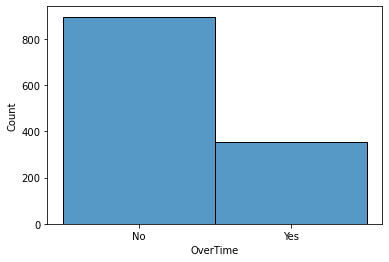

In [68]:
sns.histplot(data = data, x = Overtime)
plt.show()

6) 결론

* 야근을 하는 사람들이 그렇지 않은 사람들보다 적다

* 야근을 하는 사람들이 이직률이 높을까?

### 9) TotalWorkYears

In [69]:
Career = 'TotalWorkingYears'

1) 비즈니스 의미 : 경력과 이직률의 상관관계 조사를 위함

2) 데이터 타입 : 숫자

3) 결측치 파악

In [71]:
data[Career].isnull().sum()

0

4) 기초통계량

In [70]:
data[Career].describe()

count    1250.00000
mean       11.33920
std         7.79687
min         0.00000
25%         6.00000
50%        10.00000
75%        15.00000
max        40.00000
Name: TotalWorkingYears, dtype: float64

5) 분포

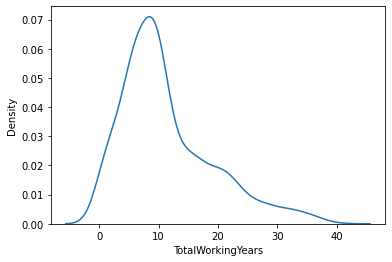

In [72]:
sns.kdeplot(data = data, x = Career)
plt.show()

6) 결론

* 경력이 15년 이하인 사람들이 대부분이다

* 경력대를 15년 이하, 15년 초과로 나눠보자

### 10) WLB

In [73]:
WLB = 'WorkLifeBalance'

1) 비즈니스 의미 : 워라밸과 이직률의 상관관계 조사를 위함

2) 데이터 타입 : 범주

3) 결측치 파악

In [74]:
data[WLB].isnull().sum()

0

4) 기초통계량

In [75]:
data[WLB].describe()

count    1250.000000
mean        2.761600
std         0.715245
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

5) 분포

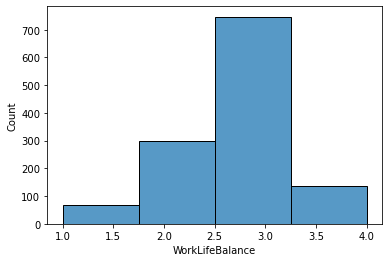

In [254]:
sns.histplot(data = data, x = WLB, bins = 4)
plt.show()

* 6) 결론

워라밸이 대체로 좋다는 응답자가 많았다.

체감상 안 좋은데 고의로 좋다고 응답한 사람들이 있을 것 같다.

### 11) MaritalStatus	

In [77]:
Marry = 'MaritalStatus'

1) 비즈니스 의미 : 결혼상태와 이직률의 상관관계

2) 데이터 타입 : 범주

3) 결측치 확인

In [78]:
data[Marry].isnull().sum()

0

4) 기초통계량

In [79]:
data[Marry].describe()

count        1250
unique          3
top       Married
freq          570
Name: MaritalStatus, dtype: object

5) 분포

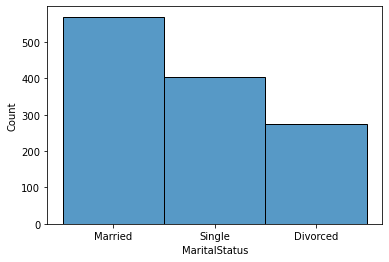

In [80]:
sns.histplot(data = data, x = Marry)
plt.show()

6) 결론

* 이혼 여부로 나누면 기혼자가 가장 많지만, 이혼 여부를 따지지 않으면 싱글인 사람이 더 많다.

* 미혼과 이혼을 묶어서 분석해 보자.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) Marry --> target

* 시각화

In [82]:
#범주 - 범주 크로스탭

MTcross = pd.crosstab(data[target],data[Marry])
MTcross

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,253,501,296
1,23,69,108


In [85]:
#범주 - 범주 크로스탭(비율)

MTcrossp = pd.crosstab(data[Marry],data[target], normalize = 'index')
MTcrossp

Attrition,0,1
MaritalStatus,,
Divorced,0.916667,0.083333
Married,0.878947,0.121053
Single,0.732673,0.267327


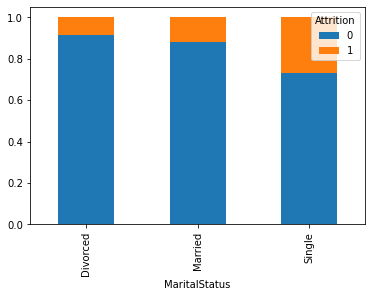

In [86]:
# 100% 비율 plot bar

MTcrossp.plot.bar(stacked = True)
plt.show()

* 수치화

In [99]:
# 카이제곱검정

modelMT = spst.chi2_contingency(MTcross)
modelMT

(53.12935546374186,
 2.9047385436211595e-12,
 2,
 array([[231.84, 478.8 , 339.36],
        [ 44.16,  91.2 ,  64.64]]))

* 결론 : 싱글인 사람이 이직을 많이 한다.

#### 1-1) 이혼자와 미혼자를 싱글로 묶어서 조회

In [190]:
data2 = data.copy()
data2.loc[data[Marry] == 'Divorced',Marry] = 'Single'
data2[Marry].describe()

count       1250
unique         2
top       Single
freq         680
Name: MaritalStatus, dtype: object

In [95]:
MTcrossp2 = pd.crosstab(data2[Marry],data2[target], normalize = 'index')
MTcrossp2

Attrition,0,1
MaritalStatus,,
Married,0.878947,0.121053
Single,0.807353,0.192647


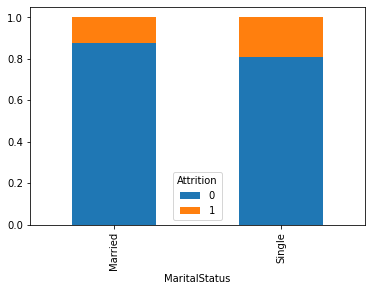

In [96]:
MTcrossp2.plot.bar(stacked = True)
plt.show()

* 결론 : 싱글로 묶기에는 이혼자의 통계는 기혼자에 가깝다.

#### 1-2) 결혼여부 - 직장거리 관계

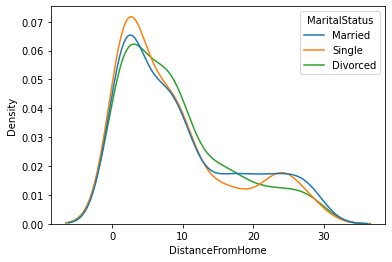

In [250]:
sns.kdeplot(data = data, x = Distance, hue = Marry, common_norm = False)
plt.show()

* 결론 : 결혼 여부와 직장거리 관계는 큰 차이 없는 것 같다.

#### 2) WLB --> target

* 시각화

In [100]:
WTcross = pd.crosstab(data[WLB],data[target])
WTcross

Attrition,0,1
WorkLifeBalance,,
1,49,20
2,251,46
3,639,108
4,111,26


In [101]:
WTcrossp = pd.crosstab(data[WLB],data[target], normalize = 'index')
WTcrossp

Attrition,0,1
WorkLifeBalance,,
1,0.710145,0.289855
2,0.845118,0.154882
3,0.855422,0.144578
4,0.810219,0.189781


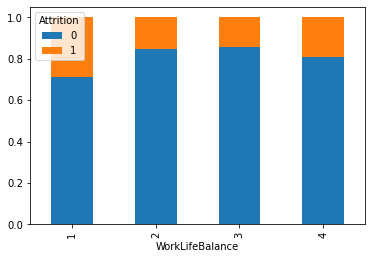

In [103]:
WTcrossp.plot.bar(stacked = True)
plt.show()

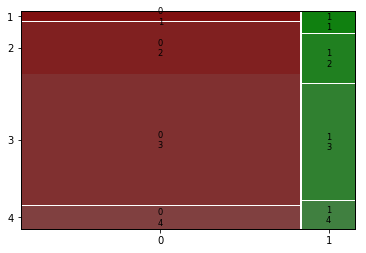

In [107]:
mosaic(data, [target,WLB])
plt.show()

* 수치화

In [102]:
modelWT = spst.chi2_contingency(WTcross)
modelWT

(10.940810822342664,
 0.012050277390233675,
 3,
 array([[ 57.96,  11.04],
        [249.48,  47.52],
        [627.48, 119.52],
        [115.08,  21.92]]))

* 결론 : 강한 상관관계

#### 3) Overtime --> target

In [110]:
OTcross = pd.crosstab(data[target],data[Overtime])
OTcross

OverTime,No,Yes
Attrition,,
0,803,247
1,93,107


In [111]:
OTcrossp = pd.crosstab(data[target],data[Overtime], normalize = 'index')
OTcrossp

OverTime,No,Yes
Attrition,,
0,0.764762,0.235238
1,0.465000,0.535000


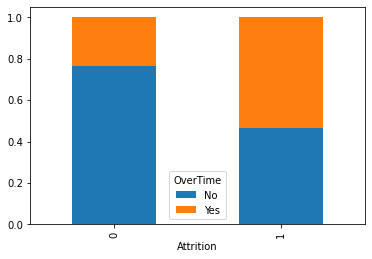

In [112]:
OTcrossp.plot.bar(stacked = True)
plt.show()

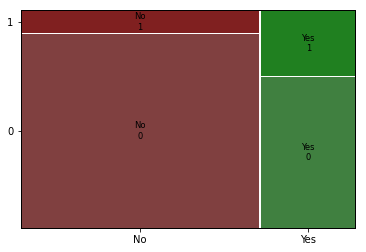

In [116]:
mosaic(data,[Overtime,target])
plt.show()

* 수치화

In [115]:
modelOT = spst.chi2_contingency(OTcross)
modelOT

(72.89605419432075,
 1.366611233098835e-17,
 1,
 array([[752.64, 297.36],
        [143.36,  56.64]]))

* 결론 : 강한 상관관계

#### 4) 추가 Relation --> target

In [117]:
RTcross = pd.crosstab(data[target],data[Relation])
RTcross

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
0,183,217,337,313
1,47,41,60,52


In [118]:
RTcrossp = pd.crosstab(data[target],data[Relation], normalize = 'index')
RTcrossp

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
0,0.174286,0.206667,0.320952,0.298095
1,0.235000,0.205000,0.300000,0.260000


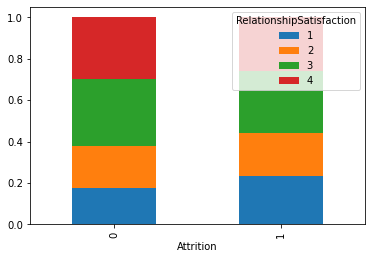

In [119]:
RTcrossp.plot.bar(stacked = True)
plt.show()

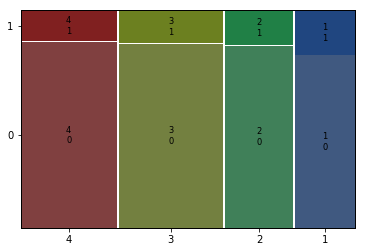

In [122]:
mosaic(data,[Relation,target])
plt.show()

* 수치화

In [123]:
modelRT = spst.chi2_contingency(RTcross)
modelRT

(4.435126158518535,
 0.2181503949975081,
 3,
 array([[193.2 , 216.72, 333.48, 306.6 ],
        [ 36.8 ,  41.28,  63.52,  58.4 ]]))

* 결론 : 상관관계 없음.

#### 추가) Relation, Satisfaction 관계

In [248]:
RScross = pd.crosstab(data[Relation],data[Satisfaction], normalize = 'index')
RScross

JobSatisfaction,1,2,3,4
RelationshipSatisfaction,,,,
1,0.200000,0.186957,0.304348,0.308696
2,0.201550,0.186047,0.310078,0.302326
3,0.198992,0.173804,0.287154,0.340050
4,0.200000,0.205479,0.284932,0.309589


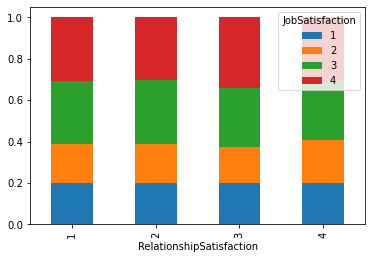

In [249]:
RScross.plot.bar(stacked = True)
plt.show()

* 결론 : 직업 만족도와 동료 관계는 큰 차이가 없다.

#### 5) 추가 JobSatisfaction --> target

In [124]:
STcross = pd.crosstab(data[target],data[Satisfaction])
STcross

JobSatisfaction,1,2,3,4
Attrition,,,,
0,197,196,308,349
1,53,39,60,48


In [125]:
STcrossp = pd.crosstab(data[target],data[Satisfaction], normalize = 'index')
STcrossp

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.187619,0.186667,0.293333,0.332381
1,0.265000,0.195000,0.300000,0.240000


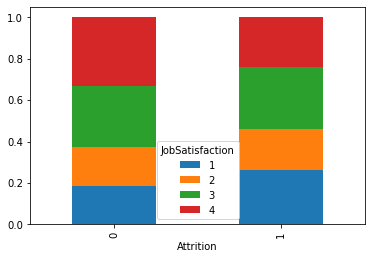

In [127]:
STcrossp.plot.bar(stacked = True)
plt.show()

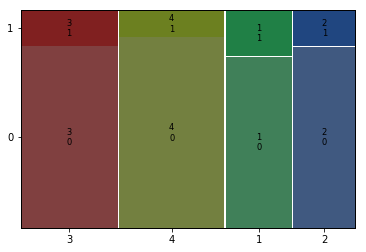

In [130]:
mosaic(data,[Satisfaction,target])
plt.show()

* 수치화

In [126]:
modelST = spst.chi2_contingency(STcross)
modelST

(9.63151465436614,
 0.021972649369306214,
 3,
 array([[210.  , 197.4 , 309.12, 333.48],
        [ 40.  ,  37.6 ,  58.88,  63.52]]))

#### 추가) WLB, Overtime 관계

In [242]:
WOcross = pd.crosstab(data[WLB],data[Overtime], normalize = 'index')
WOcross

OverTime,No,Yes
WorkLifeBalance,,
1,0.724638,0.275362
2,0.713805,0.286195
3,0.709505,0.290495
4,0.759124,0.240876


In [245]:
OWcross = pd.crosstab(data[Overtime],data[WLB], normalize = 'index')
OWcross

WorkLifeBalance,1,2,3,4
OverTime,,,,
No,0.055804,0.236607,0.591518,0.116071
Yes,0.053672,0.240113,0.612994,0.093220


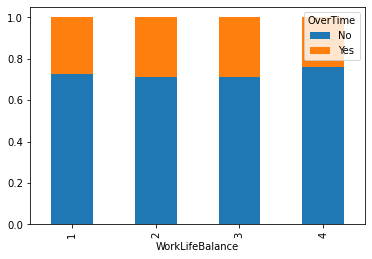

In [244]:
WOcross.plot.bar(stacked = True)
plt.show()

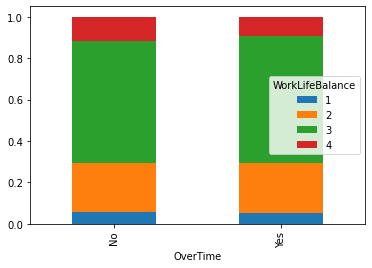

In [246]:
OWcross.plot.bar(stacked = True)
plt.show()

* 결론 : 워라밸과 야근은 상관이 없다.

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> target

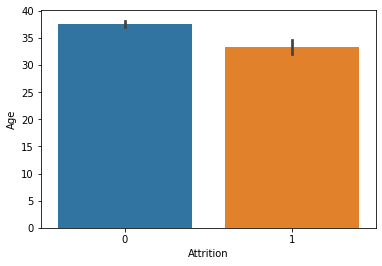

In [131]:
sns.barplot(data = data, x = target, y = Age)
plt.show()

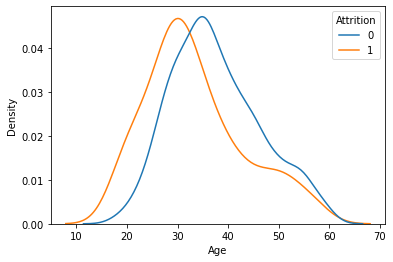

In [132]:
sns.kdeplot(data = data, x = Age, hue = target, common_norm = False)
plt.show()

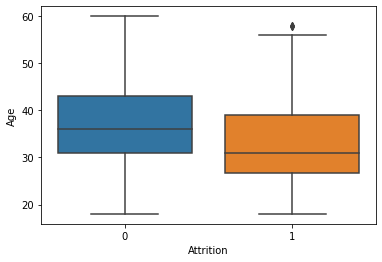

In [134]:
sns.boxplot(data = data, x = target, y = Age)
plt.show()

* 수치화

In [145]:
modelAT = sm.Logit(data[target],data[Age])
modelATf = modelAT.fit()
print(modelATf.pvalues)

Optimization terminated successfully.
         Current function value: 0.424660
         Iterations 5
Age    4.667821e-100
dtype: float64


#### 1-1) 30대를 기점으로 이직률 차이가 나는 근거는?

In [135]:
young = data[(data[Age] < 30)]
old = data[(data[Age] >= 30)]

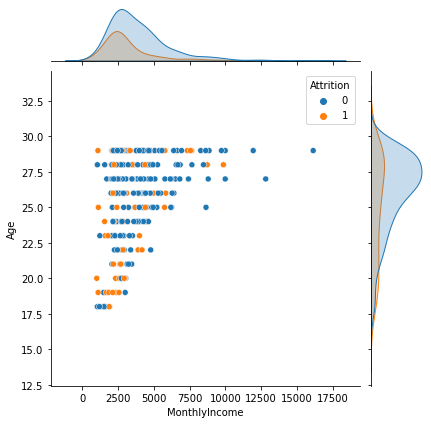

In [178]:
sns.jointplot(data = young, x = Income, y = Age, hue = target)
plt.show()

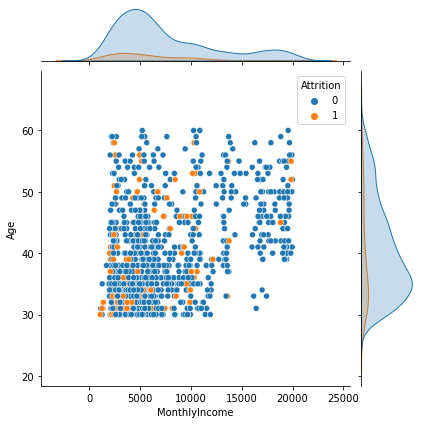

In [179]:
sns.jointplot(data = old, x = Income, y = Age, hue = target)
plt.show()

결론 : 20대 중에서 월급이 적은 사람(5천달러 미만)이 이직을 많이 하는 경향이 있다.

#### 2) Distance --> target

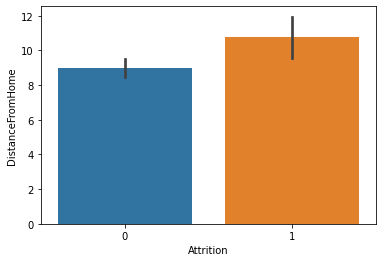

In [141]:
sns.barplot(data = data, x = target, y = Distance)
plt.show()

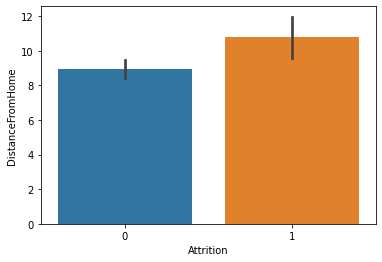

In [155]:
# 결측치 제거 버전
sns.barplot(data = data3, x = target, y = Distance)
plt.show()

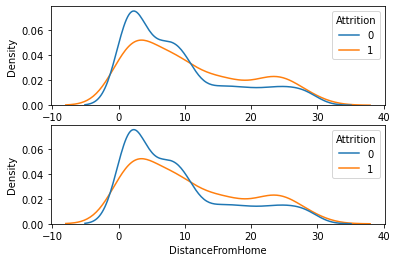

In [156]:
plt.subplot(2,1,1)
sns.kdeplot(data = data, x = Distance, hue = target, common_norm = False)

plt.subplot(2,1,2)
sns.kdeplot(data = data3, x = Distance, hue = target, common_norm = False)
plt.show()

* 수치화

In [153]:
#편의 상 결측치를 제거하고 진행
data3 = data.copy()
data3.dropna(axis = 0, inplace = True)

modelDT = sm.Logit(data3[target],data3[Distance])
modelDTf = modelDT.fit()
print(modelDTf.pvalues)

Optimization terminated successfully.
         Current function value: 0.568793
         Iterations 6
DistanceFromHome    2.694280e-44
dtype: float64


#### 추가) 혹시 연령대와?

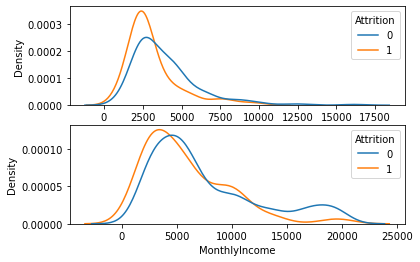

In [202]:
#Distance, Age, 이직과의 상관관계
plt.subplot(2,1,1)
sns.kdeplot(data = young, x = Income, hue = target, common_norm = False)
plt.subplot(2,1,2)
sns.kdeplot(data = old, x = Income, hue = target, common_norm = False)
plt.show()

* 결론1 : 젊은 사람들은 월급이 5천달러 이상이면 대체로 기존 직장을 유지하 하려 한다.

* 결론2 : 반면 나이 든 사람들은 월급이 1만달러를 넘지 않으면 이직하려는 경향이 있다.

추가2) 연령대, 월급대 조화

In [224]:
youngnlow = young[(young[Income] < 5000)]
youngnhigh = young[(young[Income] >= 5000)]
oldnlow = old[(old[Income] < 5000)]
oldnhigh = old[(old[Income] >= 5000)]

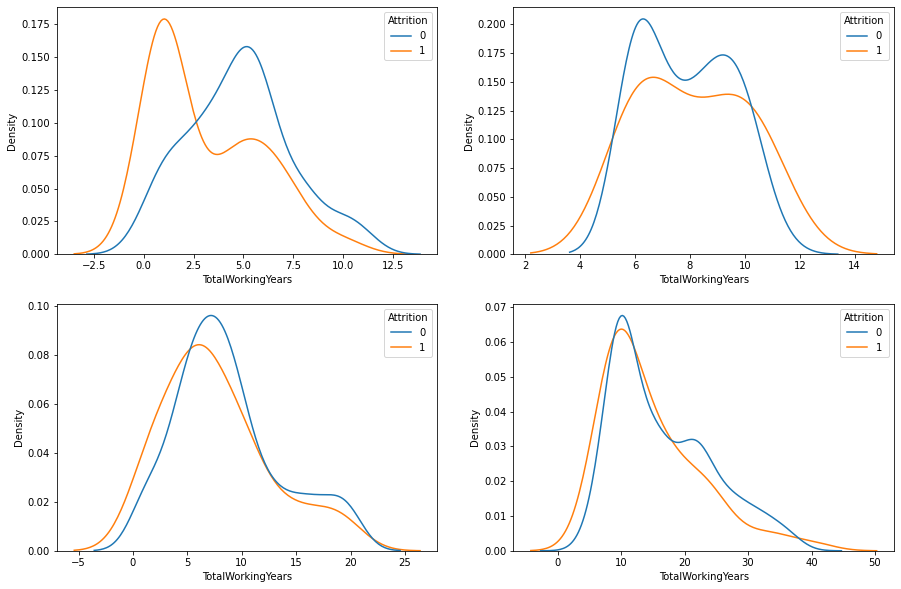

In [234]:
plt.figure(figsize = [15,10])
plt.subplot(2,2,1)
sns.kdeplot(data = youngnlow, x = Career, hue = target, common_norm = False)
plt.subplot(2,2,2)
sns.kdeplot(data = youngnhigh, x = Career, hue = target, common_norm = False)
plt.subplot(2,2,3)
sns.kdeplot(data = oldnlow, x = Career, hue = target, common_norm = False)
plt.subplot(2,2,4)
sns.kdeplot(data = oldnhigh, x = Career, hue = target, common_norm = False)
plt.show()

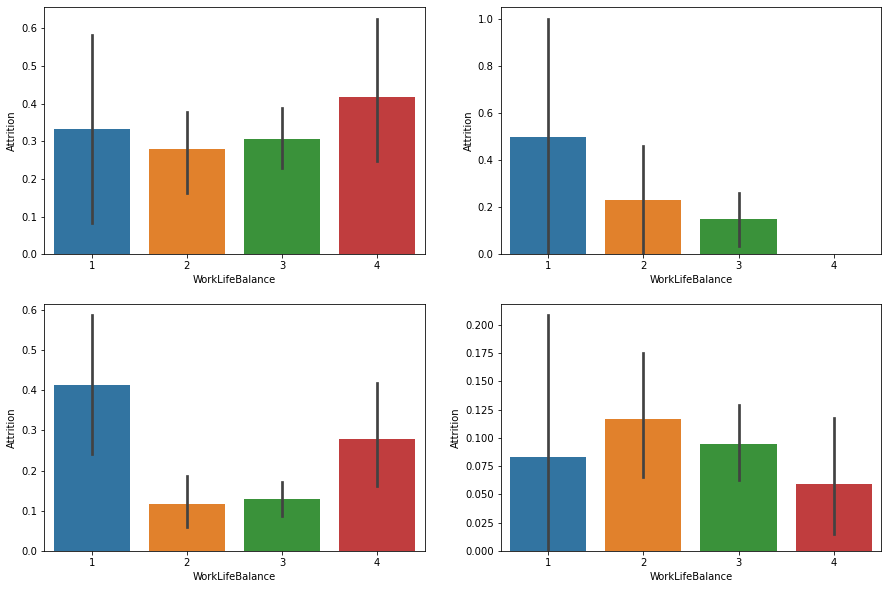

In [238]:
plt.figure(figsize = [15,10])
plt.subplot(2,2,1)
sns.barplot(data = youngnlow, y = target, x = WLB)
plt.subplot(2,2,2)
sns.barplot(data = youngnhigh, y = target, x = WLB)
plt.subplot(2,2,3)
sns.barplot(data = oldnlow, y = target, x = WLB)
plt.subplot(2,2,4)
sns.barplot(data = oldnhigh, y = target, x = WLB)
plt.show()

* 결론 : 젊고, 경력 짧고, 월급 적은 사람이 이직을 많이 하려 한다.

#### 3) Income --> target

* 시각화

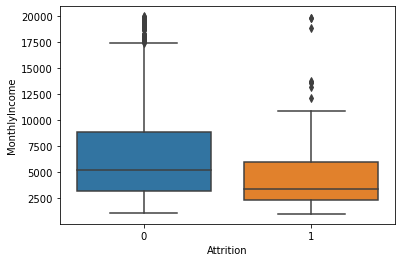

In [177]:
sns.boxplot(data = data, x = target, y = Income)
plt.show()

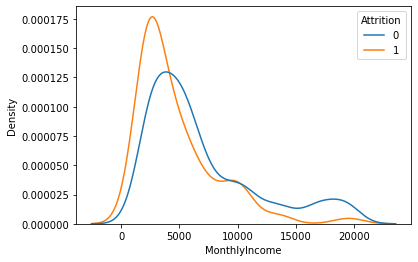

In [181]:
sns.kdeplot(data = data, x = Income, hue = target, common_norm = False)
plt.show()

In [182]:
#연봉 5천 전후로 나눠 보자

low = data[(data[Income] <= 5000)]
high = data[(data[Income] > 5000)]

In [222]:
lTOcross = pd.crosstab(low[Overtime],low[target],normalize = 'index')
lTOcross

Attrition,0,1
OverTime,,
No,0.863135,0.136865
Yes,0.572254,0.427746


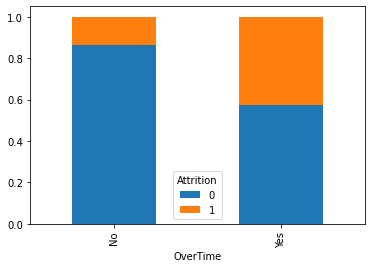

In [221]:
lTOcross.plot.bar(stacked = True)
plt.show()

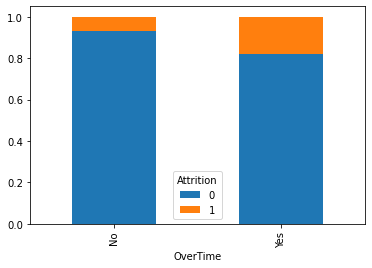

In [223]:
hOTcross = pd.crosstab(high[Overtime],high[target],normalize = 'index')

hOTcross.plot.bar(stacked = True)
plt.show()

* 결론 : 야근 + 박봉 조합에 처한 사람들의 이직률이 높다.

* 수치화

In [214]:
modelIT = sm.Logit(data[target],data[Career])
modelITf = modelIT.fit()
print(modelITf.pvalues)

Optimization terminated successfully.
         Current function value: 0.432906
         Iterations 6
TotalWorkingYears    1.867338e-74
dtype: float64


#### 4) 추가 Career --> target

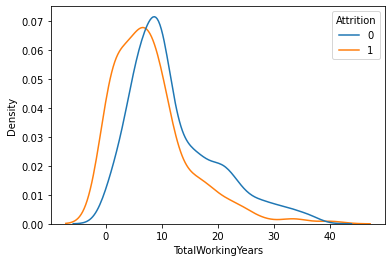

In [205]:
sns.kdeplot(data = data, x = Career, hue = target, common_norm = False)
plt.show()

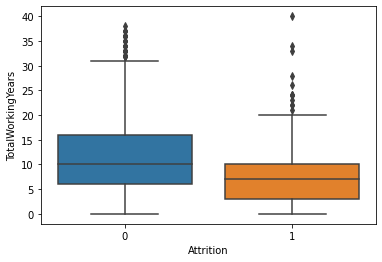

In [206]:
sns.boxplot(data = data, x = target, y = Career)
plt.show()

* 수치화

In [207]:
modelCT = sm.Logit(data3[target],data3[Distance])
modelCTf = modelCT.fit()
print(modelCTf.pvalues)

Optimization terminated successfully.
         Current function value: 0.568793
         Iterations 6
DistanceFromHome    2.694280e-44
dtype: float64


* 결론 : 경력이 짧을수록 이직하려는 경향이 크다.

#### 5) 추가 NumCompaniesWorked --> target

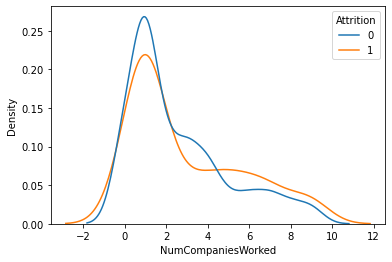

In [208]:
sns.kdeplot(data = data, x = WorkedBefore, hue = target, common_norm = False)
plt.show()

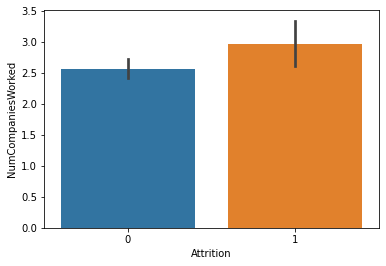

In [210]:
sns.barplot(data = data, y = WorkedBefore, x = target)
plt.show()

#### 추가) 경력- 이직 횟수와의 상관관계

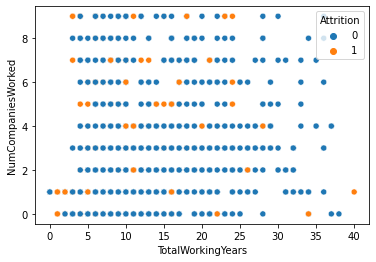

In [218]:
sns. scatterplot(data = data, x = Career, y = WorkedBefore, hue = target)
plt.show()

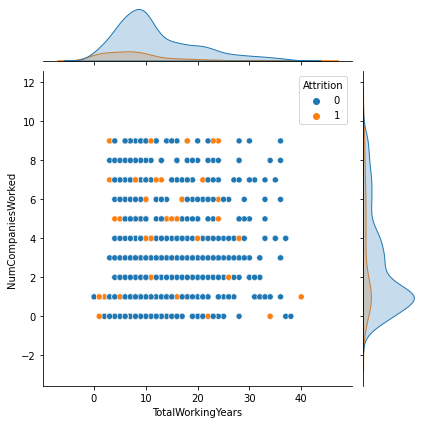

In [217]:
sns. jointplot(data = data, x = Career, y = WorkedBefore, hue = target)
plt.show()

* 수치화

In [213]:
modelNT = sm.Logit(data3[target],data3[WorkedBefore])
modelNTf = modelNT.fit()
print(modelNTf.pvalues)

Optimization terminated successfully.
         Current function value: 0.569716
         Iterations 6
NumCompaniesWorked    5.862322e-43
dtype: float64


## 4.관계 정리

### 1) 강한관계의 변수

결혼 여부, 워라밸, 야근여부, 연령, 이전에 일한 회사 수, 경력

### 2) 약한관계의 변수

직업만족도

### 3) 관계 없음

동료관계

## 5.추가 분석